The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


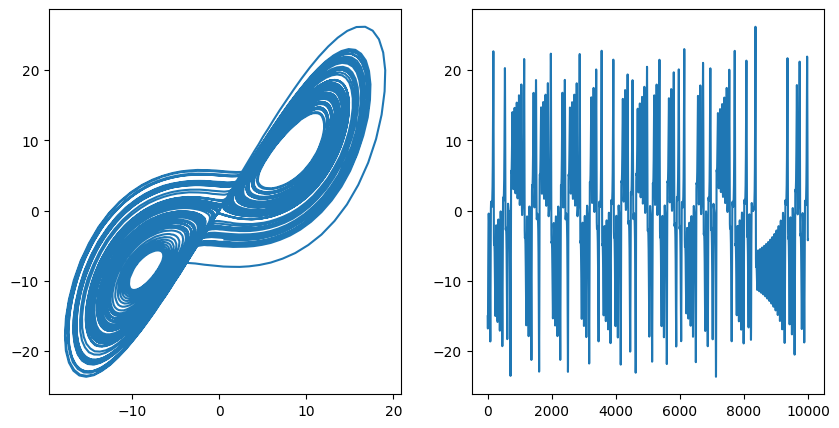

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import torch

%load_ext autoreload
%autoreload 2
from dysts.flows import Lorenz

## Load and simulate an attractor
model = Lorenz()
model.dt = 0.01
noise = 0.01
sol = model.make_trajectory(1000, resample=False, noise=0.0)

sol += np.random.normal(0, noise, sol.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(sol[:, 0], sol[:, 1])
ax[1].plot(sol[:, 1])

In [77]:

sol = sol[np.newaxis]

In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
from RegularizingEmbeddings.amplification import find_neighbors, get_dists_bw_all_neighbors 
distances, indices = find_neighbors(sol[0], 10)
print(distances.shape, indices.shape)
dists = get_dists_bw_all_neighbors(sol[0], indices)
print(dists)

(10000, 10) (10000, 10)
[0.27243601 0.28934429 0.29534164 ... 0.54726184 0.50679035 0.49112452]


In [88]:
#compute a delay embedding
from RegularizingEmbeddings.models.delayed_mlp import embed_signal_torch
H = embed_signal_torch(sol, 10, 1)
H.shape

torch.Size([1, 10000, 30])

In [90]:
from RegularizingEmbeddings.amplification import compute_EkT

E_kT = compute_EkT(sol, H, 10, 5)
E_kT.shape

(9995,)

In [91]:
from RegularizingEmbeddings.amplification import compute_Ek

max_T = 5
n_neighbors = 10
E_k = compute_Ek(sol, H, n_neighbors, max_T)
E_k.shape

(9994,)
(9994,)
(9994,)
(9994,)
(9994,)


(5, 9994)

In [94]:
%pdb

Automatic pdb calling has been turned ON


In [106]:
from RegularizingEmbeddings.amplification import compute_eps_k
mdists = compute_eps_k(H,n_neighbors,thresh=max_T)
mdists.shape

torch.Size([9994])

In [104]:
from RegularizingEmbeddings.amplification import compute_noise_amp_k

noise_amp, E_k, eps_k = compute_noise_amp_k(sol, H, n_neighbors, max_T)

computing noise amp


In [107]:
noise_amp,E_k, eps_k

(tensor(0.0550, dtype=torch.float64),
 tensor(0.3844, dtype=torch.float64),
 tensor(7.1578))